In [241]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr, spearmanr
import collections

In [242]:
movies = pd.read_csv("movies_cleaned.csv")

In [244]:
movies

,Unnamed: 0,title,year,rating,genres,runtime,votes,metascore,decade
0,0,The Shawshank Redemption,1994,9.3,Drama,142,2757059,82.0,1990s
1,1,The Godfather,1972,9.2,"Crime, Drama",175,1918435,100.0,1970s
2,2,The Chaos Class,1975,9.2,"Comedy, Drama",87,41819,NaN,1970s
3,3,The Dark Knight,2008,9.0,"Action, Crime, Drama",152,2730041,84.0,2000s
4,4,Schindler's List,1993,9.0,"Biography, Drama, History",195,1389557,95.0,1990s
...,...,...,...,...,...,...,...,...,...
995,995,Harry Potter and the Half-Blood Prince,2009,7.6,"Action, Adventure, Family",153,566356,78.0,2000s
996,996,The Others,2001,7.6,"Horror, Mystery, Thriller",104,377725,74.0,2000s
997,997,The Godfather Part III,1990,7.6,"Crime, Drama",162,408911,60.0,1990s
998,998,Inside Man,2006,7.6,"Crime, Drama, Mystery",129,384826,76.0,2000s


In [275]:
movies.drop(['Unnamed: 0'], axis=1, inplace = True)

In [276]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   year       1000 non-null   int64  
 2   rating     1000 non-null   float64
 3   genres     1000 non-null   object 
 4   runtime    1000 non-null   int64  
 5   votes      1000 non-null   int64  
 6   metascore  815 non-null    float64
 7   decade     1000 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [277]:
movies.describe()

,year,rating,runtime,votes,metascore
count,1000.00000,1000.00000,1000.000000,1.000000e+03,815.000000
mean,1992.16200,7.98330,125.308000,3.131757e+05,79.087117
std,24.38763,0.27442,29.489774,3.858921e+05,11.987033
min,1920.00000,7.60000,45.000000,2.525800e+04,33.000000
25%,1975.00000,7.80000,103.750000,5.733900e+04,71.000000
50%,2000.00000,7.90000,121.000000,1.432260e+05,80.000000
75%,2012.00000,8.10000,140.000000,4.390858e+05,88.000000
max,2023.00000,9.30000,321.000000,2.757059e+06,100.000000


In [278]:
movies.genres.str.contains('Drama').value_counts()

genres
True     739
False    261
Name: count, dtype: int64

In [279]:
ctr = collections.Counter()
for r in movies["genres"]:
    ctr.update(r.split(", "))
ctr

Counter({'Drama': 739,
         'Comedy': 228,
         'Action': 213,
         'Crime': 199,
         'Adventure': 183,
         'Thriller': 137,
         'Romance': 125,
         'Biography': 104,
         'Mystery': 101,
         'Animation': 80,
         'Sci-Fi': 62,
         'Fantasy': 61,
         'Family': 55,
         'War': 51,
         'History': 43,
         'Music': 32,
         'Horror': 30,
         'Film-Noir': 22,
         'Sport': 17,
         'Western': 16,
         'Musical': 16})

[Text(0, 0, '739'),
 Text(0, 0, '199'),
 Text(0, 0, '228'),
 Text(0, 0, '213'),
 Text(0, 0, '104'),
 Text(0, 0, '43'),
 Text(0, 0, '183'),
 Text(0, 0, '101'),
 Text(0, 0, '137'),
 Text(0, 0, '80'),
 Text(0, 0, '62'),
 Text(0, 0, '125'),
 Text(0, 0, '16'),
 Text(0, 0, '61'),
 Text(0, 0, '51'),
 Text(0, 0, '55'),
 Text(0, 0, '30'),
 Text(0, 0, '32'),
 Text(0, 0, '22'),
 Text(0, 0, '16'),
 Text(0, 0, '17')]

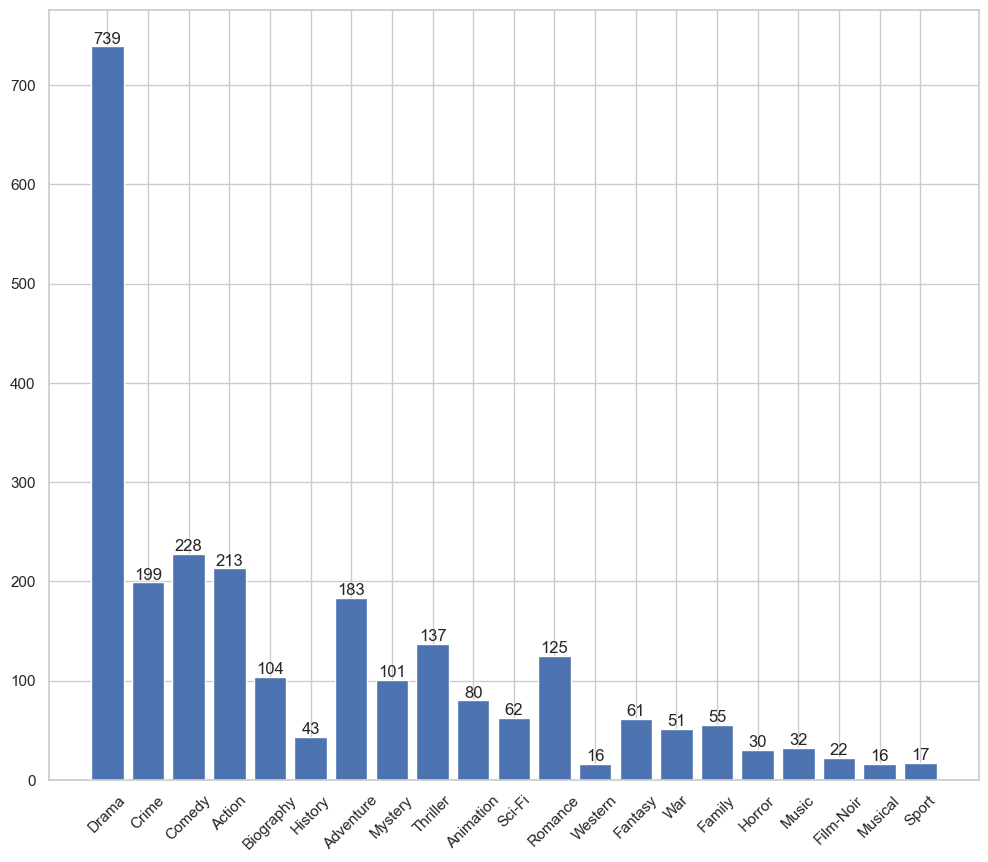

In [280]:
fig = plt.figure(figsize=(12, 10))
plt.xticks(rotation = 45)
bars = plt.bar(ctr.keys(), ctr.values())
plt.bar_label(bars)

In [281]:
ctr.most_common()

[('Drama', 739),
 ('Comedy', 228),
 ('Action', 213),
 ('Crime', 199),
 ('Adventure', 183),
 ('Thriller', 137),
 ('Romance', 125),
 ('Biography', 104),
 ('Mystery', 101),
 ('Animation', 80),
 ('Sci-Fi', 62),
 ('Fantasy', 61),
 ('Family', 55),
 ('War', 51),
 ('History', 43),
 ('Music', 32),
 ('Horror', 30),
 ('Film-Noir', 22),
 ('Sport', 17),
 ('Western', 16),
 ('Musical', 16)]

In [282]:
sns.set()

In [283]:
sns.set_style('whitegrid')

In [284]:
movies.year.describe()

count    1000.00000
mean     1992.16200
std        24.38763
min      1920.00000
25%      1975.00000
50%      2000.00000
75%      2012.00000
max      2023.00000
Name: year, dtype: float64

Text(0.5, 0, 'Year')

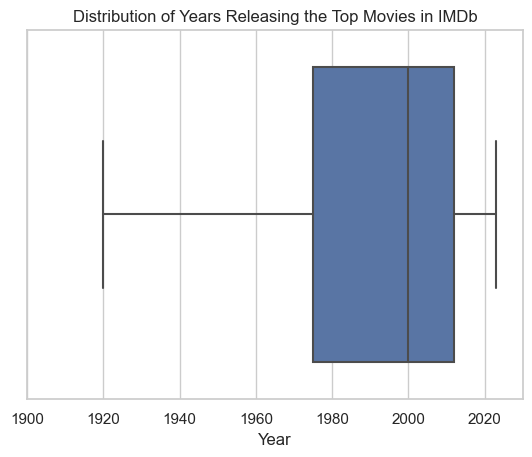

In [285]:
sns.boxplot(x = movies.year)
plt.xlim(1900, 2030)
plt.title('Distribution of Years Releasing the Top Movies in IMDb')
plt.xlabel('Year')

In [286]:
movies.rating.describe()

count    1000.00000
mean        7.98330
std         0.27442
min         7.60000
25%         7.80000
50%         7.90000
75%         8.10000
max         9.30000
Name: rating, dtype: float64

Text(0.5, 0, 'IMDb rating')

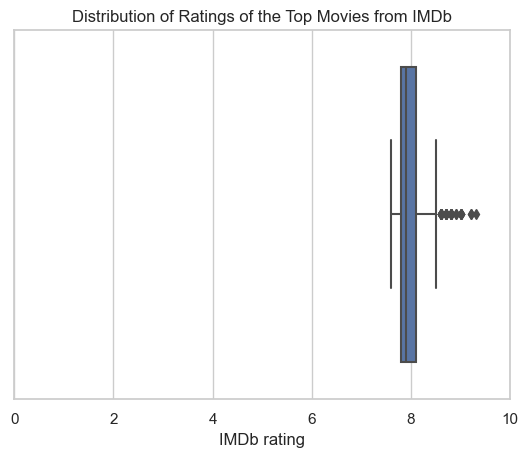

In [287]:
sns.boxplot(x = movies.rating)
plt.xlim(0, 10)
plt.title('Distribution of Ratings of the Top Movies from IMDb')
plt.xlabel('IMDb rating')

In [288]:
movies.rating.sort_values(ascending=False)

0      9.3
2      9.2
1      9.2
3      9.0
4      9.0
      ... 
975    7.6
976    7.6
977    7.6
978    7.6
999    7.6
Name: rating, Length: 1000, dtype: float64

In [289]:
# keep in mind that these record the best of the best movies in the database

In [290]:
movies.runtime.describe()

count    1000.000000
mean      125.308000
std        29.489774
min        45.000000
25%       103.750000
50%       121.000000
75%       140.000000
max       321.000000
Name: runtime, dtype: float64

Text(0.5, 0, 'Runtime (minutes)')

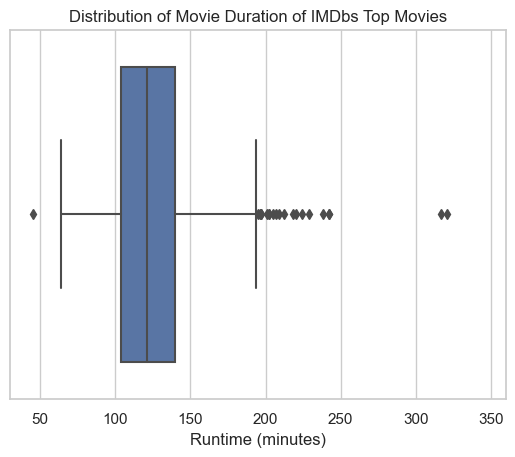

In [291]:
sns.boxplot(x = movies.runtime)
plt.xlim(30, 360)
plt.title('Distribution of Movie Duration of IMDb''s Top Movies')
plt.xlabel('Runtime (minutes)')

In [292]:
movies.sort_values(by = 'runtime', ascending = False).head(20)

,title,year,rating,genres,runtime,votes,metascore,decade
186,Gangs of Wasseypur,2012,8.2,"Action, Comedy, Crime",321,99599,89.0,2010s
891,1900,1976,7.7,"Drama, History",317,26379,70.0,1970s
907,Hamlet,1996,7.7,Drama,242,39052,NaN,1990s
356,Zack Snyder's Justice League,2021,8.0,"Action, Adventure, Fantasy",242,415674,54.0,2020s
174,Gone with the Wind,1939,8.2,"Drama, Romance, War",238,323241,97.0,1930s
108,Once Upon a Time in America,1984,8.3,"Crime, Drama",229,361537,75.0,1980s
303,Lagaan: Once Upon a Time in India,2001,8.1,"Drama, Musical, Sport",224,117189,84.0,2000s
535,The Ten Commandments,1956,7.9,"Adventure, Drama, Family",220,74546,NaN,1950s
117,Lawrence of Arabia,1962,8.3,"Adventure, Biography, Drama",218,302085,100.0,1960s
275,Ben-Hur,1959,8.1,"Adventure, Drama",212,245725,90.0,1950s


In [293]:
# checking if there are any mistakes with the outliers

In [294]:
# somehow someone out there is really making these super long movies

In [295]:
movies.votes.describe()

count    1.000000e+03
mean     3.131757e+05
std      3.858921e+05
min      2.525800e+04
25%      5.733900e+04
50%      1.432260e+05
75%      4.390858e+05
max      2.757059e+06
Name: votes, dtype: float64

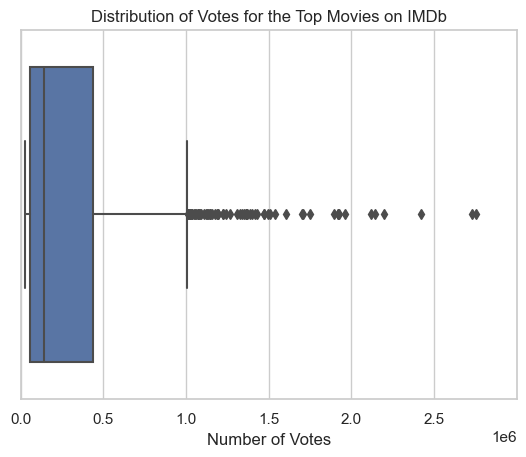

In [296]:
sns.boxplot(x = movies.votes)
plt.xlim(0, 3000000)
plt.xticks(np.arange(0, 3000000, 500000))
plt.title('Distribution of Votes for the Top Movies on IMDb')
plt.xlabel('Number of Votes')
plt.show()

In [297]:
movies.sort_values(by = 'votes', ascending = False)

,title,year,rating,genres,runtime,votes,metascore,decade
0,The Shawshank Redemption,1994,9.3,Drama,142,2757059,82.0,1990s
3,The Dark Knight,2008,9.0,"Action, Crime, Drama",152,2730041,84.0,2000s
11,Inception,2010,8.8,"Action, Adventure, Sci-Fi",148,2422729,74.0,2010s
13,Fight Club,1999,8.8,Drama,139,2195220,66.0,1990s
14,Forrest Gump,1994,8.8,"Drama, Romance",142,2144505,82.0,1990s
...,...,...,...,...,...,...,...,...
754,Great Expectations,1946,7.8,"Adventure, Drama, Mystery",118,25448,90.0,1940s
941,How Green Was My Valley,1941,7.7,"Drama, Family",118,25407,88.0,1940s
913,"What's Up, Doc?",1972,7.7,"Comedy, Romance",94,25289,NaN,1970s
341,Viridiana,1961,8.1,Drama,91,25261,NaN,1960s


In [298]:
movies.metascore.describe()

count    815.000000
mean      79.087117
std       11.987033
min       33.000000
25%       71.000000
50%       80.000000
75%       88.000000
max      100.000000
Name: metascore, dtype: float64

Text(0.5, 0, 'Metascore')

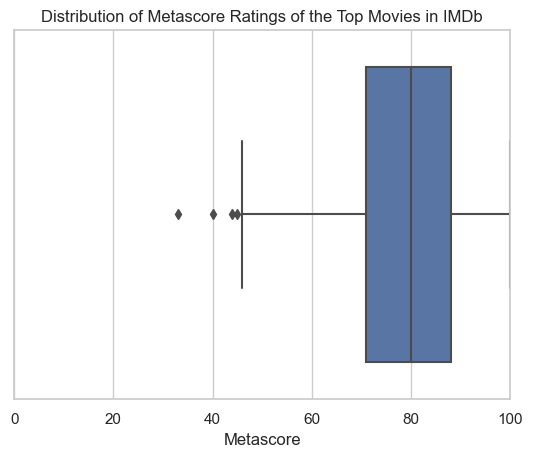

In [299]:
sns.boxplot(x = movies.metascore)
plt.xlim(0, 100)
plt.title('Distribution of Metascore Ratings of the Top Movies in IMDb')
plt.xlabel('Metascore')

In [300]:
movies.dropna(how='any').sort_values(by = 'metascore', ascending = False)

,title,year,rating,genres,runtime,votes,metascore,decade
123,Vertigo,1958,8.3,"Mystery, Romance, Thriller",128,411961,100.0,1950s
526,Boyhood,2014,7.9,Drama,165,360632,100.0,2010s
57,Rear Window,1954,8.5,"Mystery, Thriller",112,503289,100.0,1950s
291,Three Colors: Red,1994,8.1,"Drama, Mystery, Romance",99,106580,100.0,1990s
295,Fanny and Alexander,1982,8.1,Drama,188,65541,100.0,1980s
...,...,...,...,...,...,...,...,...
994,Saw,2004,7.6,"Horror, Mystery, Thriller",103,436662,46.0,2000s
868,Flipped,2010,7.7,"Comedy, Drama, Romance",90,93789,45.0,2010s
852,The Boondock Saints,1999,7.7,"Action, Thriller",108,243813,44.0,1990s
779,Kai Po Che,2013,7.8,"Drama, Sport",120,37891,40.0,2010s


In [301]:
movies.dropna(how='any').describe()

,year,rating,runtime,votes,metascore
count,815.000000,815.000000,815.000000,8.150000e+02,815.000000
mean,1991.996319,7.965767,124.209816,3.693858e+05,79.087117
std,23.141085,0.276906,28.925923,4.060632e+05,11.987033
min,1925.000000,7.600000,64.000000,2.525800e+04,33.000000
25%,1978.000000,7.800000,103.500000,8.067000e+04,71.000000
50%,1999.000000,7.900000,120.000000,2.135540e+05,80.000000
75%,2010.000000,8.100000,137.000000,5.348540e+05,88.000000
max,2023.000000,9.300000,321.000000,2.757059e+06,100.000000


In [302]:
movies

,title,year,rating,genres,runtime,votes,metascore,decade
0,The Shawshank Redemption,1994,9.3,Drama,142,2757059,82.0,1990s
1,The Godfather,1972,9.2,"Crime, Drama",175,1918435,100.0,1970s
2,The Chaos Class,1975,9.2,"Comedy, Drama",87,41819,NaN,1970s
3,The Dark Knight,2008,9.0,"Action, Crime, Drama",152,2730041,84.0,2000s
4,Schindler's List,1993,9.0,"Biography, Drama, History",195,1389557,95.0,1990s
...,...,...,...,...,...,...,...,...
995,Harry Potter and the Half-Blood Prince,2009,7.6,"Action, Adventure, Family",153,566356,78.0,2000s
996,The Others,2001,7.6,"Horror, Mystery, Thriller",104,377725,74.0,2000s
997,The Godfather Part III,1990,7.6,"Crime, Drama",162,408911,60.0,1990s
998,Inside Man,2006,7.6,"Crime, Drama, Mystery",129,384826,76.0,2000s


In [303]:
movies.groupby(movies.decade).describe()

year                                                                   
        count         mean       std     min      25%     50%     75%     max   
decade                                                                          
1920s    11.0  1924.818182  2.786330  1920.0  1923.00  1925.0  1927.0  1928.0  \
1930s    24.0  1935.291667  3.099497  1930.0  1932.75  1935.5  1938.0  1939.0   
1940s    41.0  1944.463415  3.058575  1940.0  1941.00  1945.0  1947.0  1949.0   
1950s    58.0  1954.724138  2.942687  1950.0  1952.00  1955.0  1957.0  1959.0   
1960s    70.0  1964.042857  2.871326  1960.0  1962.00  1964.0  1967.0  1969.0   
1970s    69.0  1974.391304  2.691038  1970.0  1972.00  1974.0  1976.0  1979.0   
1980s    85.0  1985.047059  2.844819  1980.0  1983.00  1985.0  1987.0  1989.0   
1990s   136.0  1994.852941  2.784958  1990.0  1993.00  1995.0  1997.0  1999.0   
2000s   207.0  2004.594203  2.884435  2000.0  2002.00  2004.0  2007.0  2009.0   
2010s   248.0  2014.745968  2.719696  2010.0  2013.00  2015.0  2017.0  2019.0   
2020s    51.0  2021.411765  0.920358  2020.0  2021.00  2022.0  2022.0  2023.0   

       rating            ...      votes            metascore              
        count      mean  ...        75%        max     count       mean   
decade                   ...                                              
1920s    11.0  8.109091  ...  107636.00   178715.0       5.0  95.600000  \
1930s    24.0  7.975000  ...  110215.00   411699.0      20.0  91.100000   
1940s    41.0  7.997561  ...  128295.00   585294.0      29.0  91.413793   
1950s    58.0  8.070690  ...  154913.50   816794.0      46.0  90.130435   
1960s    70.0  8.000000  ...  181467.00   779742.0      57.0  84.122807   
1970s    69.0  8.023188  ...  270209.00  1918435.0      58.0  83.344828   
1980s    85.0  7.974118  ...  419072.00  1325689.0      77.0  76.974026   
1990s   136.0  7.996324  ...  596910.00  2757059.0     122.0  75.393443   
2000s   207.0  7.938647  ...  611203.50  2730041.0     188.0  75.250000   
2010s   248.0  7.949194  ...  581683.25  2422729.0     185.0  77.167568   
2020s    51.0  8.100000  ...  196156.00   806468.0      28.0  77.928571   

                                                    
              std   min    25%   50%    75%    max  
decade                                              
1920s    3.361547  90.0  95.00  97.0  98.00   98.0  
1930s    6.758231  73.0  89.25  92.0  96.25   99.0  
1940s    6.483591  73.0  88.00  92.0  96.00  100.0  
1950s    8.609062  63.0  85.50  91.5  97.00  100.0  
1960s   10.276656  60.0  76.00  86.0  93.00  100.0  
1970s    9.308649  58.0  77.00  84.5  90.75  100.0  
1980s   11.617788  47.0  70.00  78.0  85.00  100.0  
1990s   11.125548  44.0  68.00  76.0  84.00  100.0  
2000s   12.032321  33.0  67.00  76.0  84.00   98.0  
2010s   11.232185  40.0  71.00  78.0  85.00  100.0  
2020s   10.370644  54.0  72.00  78.0  86.25   97.0  

[11 rows x 40 columns]

In [304]:
movies

,title,year,rating,genres,runtime,votes,metascore,decade
0,The Shawshank Redemption,1994,9.3,Drama,142,2757059,82.0,1990s
1,The Godfather,1972,9.2,"Crime, Drama",175,1918435,100.0,1970s
2,The Chaos Class,1975,9.2,"Comedy, Drama",87,41819,NaN,1970s
3,The Dark Knight,2008,9.0,"Action, Crime, Drama",152,2730041,84.0,2000s
4,Schindler's List,1993,9.0,"Biography, Drama, History",195,1389557,95.0,1990s
...,...,...,...,...,...,...,...,...
995,Harry Potter and the Half-Blood Prince,2009,7.6,"Action, Adventure, Family",153,566356,78.0,2000s
996,The Others,2001,7.6,"Horror, Mystery, Thriller",104,377725,74.0,2000s
997,The Godfather Part III,1990,7.6,"Crime, Drama",162,408911,60.0,1990s
998,Inside Man,2006,7.6,"Crime, Drama, Mystery",129,384826,76.0,2000s


In [305]:
ctr

Counter({'Drama': 739,
         'Comedy': 228,
         'Action': 213,
         'Crime': 199,
         'Adventure': 183,
         'Thriller': 137,
         'Romance': 125,
         'Biography': 104,
         'Mystery': 101,
         'Animation': 80,
         'Sci-Fi': 62,
         'Fantasy': 61,
         'Family': 55,
         'War': 51,
         'History': 43,
         'Music': 32,
         'Horror': 30,
         'Film-Noir': 22,
         'Sport': 17,
         'Western': 16,
         'Musical': 16})

In [306]:
genre_list = ['Drama', 'Comedy', 'Action', 'Crime', 'Adventure', 'Thriller', 'Romance', 'Biography', 'Mystery', 'Animation', 'Sci-fi', 'Fantasy', 'Family', 'War', 'History', 'Music', 'Horror', 'Film-Noir', 'Sport', 'Western', 'Musical']

In [307]:
len(genre_list)

21

In [308]:
s = pd.Series(movies.genres)

In [309]:
s

In [310]:
dummies = movies['genres'].str.get_dummies(sep=', ')

In [311]:
dummies

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
997,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [312]:
movies

,title,year,rating,genres,runtime,votes,metascore,decade
0,The Shawshank Redemption,1994,9.3,Drama,142,2757059,82.0,1990s
1,The Godfather,1972,9.2,"Crime, Drama",175,1918435,100.0,1970s
2,The Chaos Class,1975,9.2,"Comedy, Drama",87,41819,NaN,1970s
3,The Dark Knight,2008,9.0,"Action, Crime, Drama",152,2730041,84.0,2000s
4,Schindler's List,1993,9.0,"Biography, Drama, History",195,1389557,95.0,1990s
...,...,...,...,...,...,...,...,...
995,Harry Potter and the Half-Blood Prince,2009,7.6,"Action, Adventure, Family",153,566356,78.0,2000s
996,The Others,2001,7.6,"Horror, Mystery, Thriller",104,377725,74.0,2000s
997,The Godfather Part III,1990,7.6,"Crime, Drama",162,408911,60.0,1990s
998,Inside Man,2006,7.6,"Crime, Drama, Mystery",129,384826,76.0,2000s


In [314]:
dummy_df = movies.join(dummies)

In [315]:
dummy_df

,title,year,rating,genres,runtime,votes,metascore,decade,Action,Adventure,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,The Shawshank Redemption,1994,9.3,Drama,142,2757059,82.0,1990s,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,1972,9.2,"Crime, Drama",175,1918435,100.0,1970s,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Chaos Class,1975,9.2,"Comedy, Drama",87,41819,NaN,1970s,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight,2008,9.0,"Action, Crime, Drama",152,2730041,84.0,2000s,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Schindler's List,1993,9.0,"Biography, Drama, History",195,1389557,95.0,1990s,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Harry Potter and the Half-Blood Prince,2009,7.6,"Action, Adventure, Family",153,566356,78.0,2000s,1,1,...,0,0,0,0,0,0,0,0,0,0
996,The Others,2001,7.6,"Horror, Mystery, Thriller",104,377725,74.0,2000s,0,0,...,1,0,0,1,0,0,0,1,0,0
997,The Godfather Part III,1990,7.6,"Crime, Drama",162,408911,60.0,1990s,0,0,...,0,0,0,0,0,0,0,0,0,0
998,Inside Man,2006,7.6,"Crime, Drama, Mystery",129,384826,76.0,2000s,0,0,...,0,0,0,1,0,0,0,0,0,0


In [234]:
dummy_df.to_csv('dummies.csv')

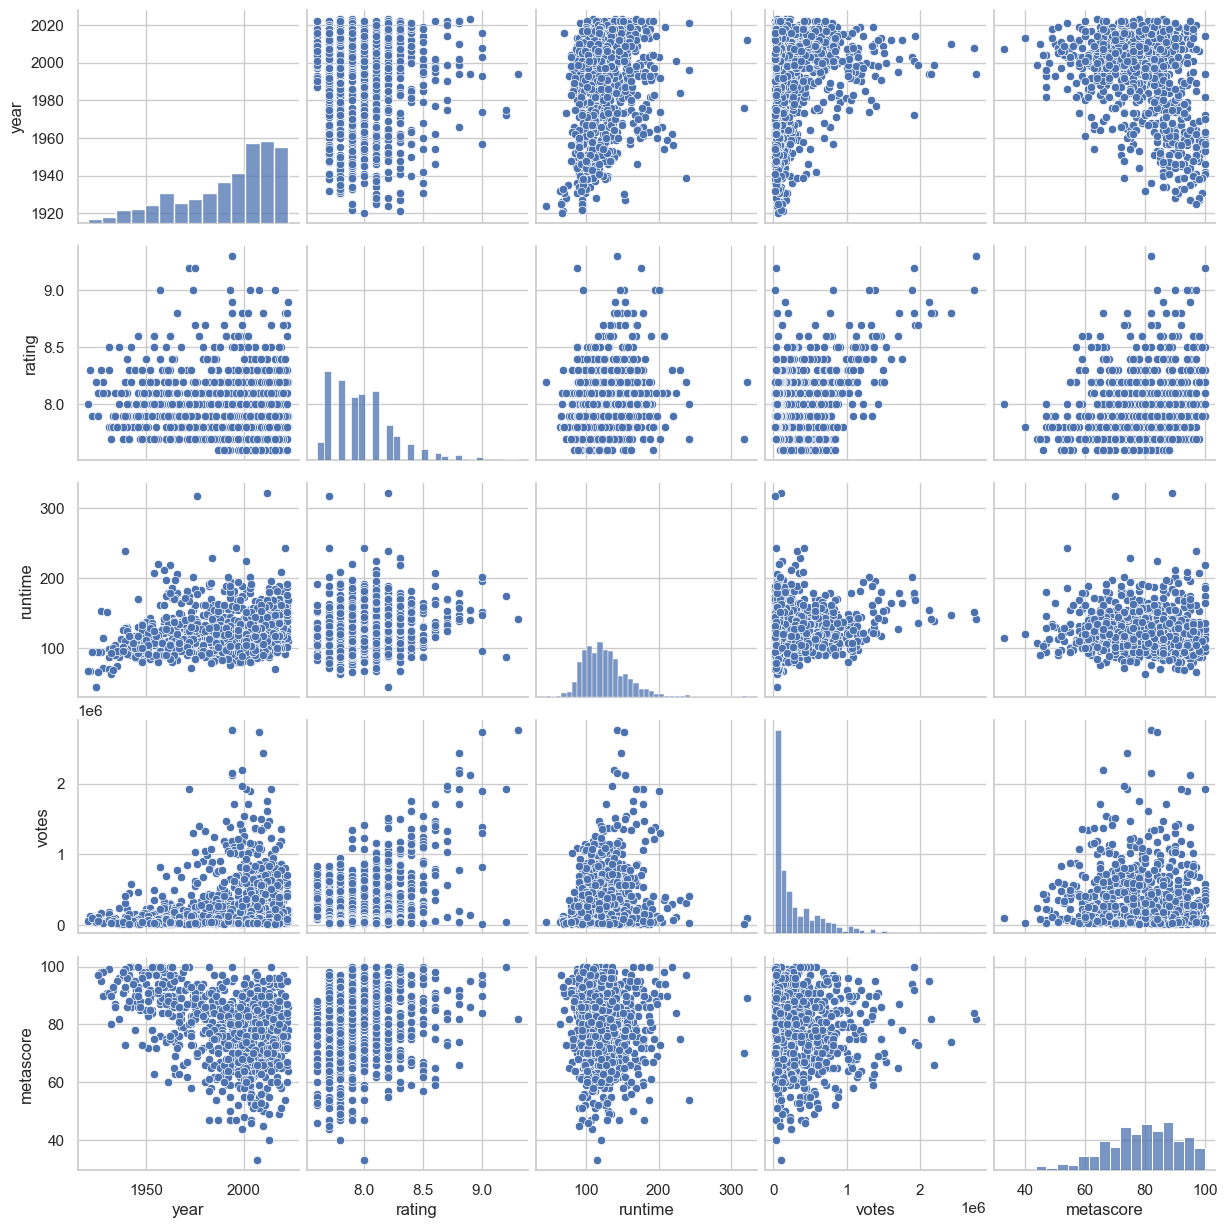

In [316]:
sns.pairplot(movies)

In [317]:
dummies

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
997,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
